In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import math

import sklearn
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

## White wine

In [10]:
# Data preparation
data = pd.read_csv("winequality-white-copy.csv")
print(data.shape)
data.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


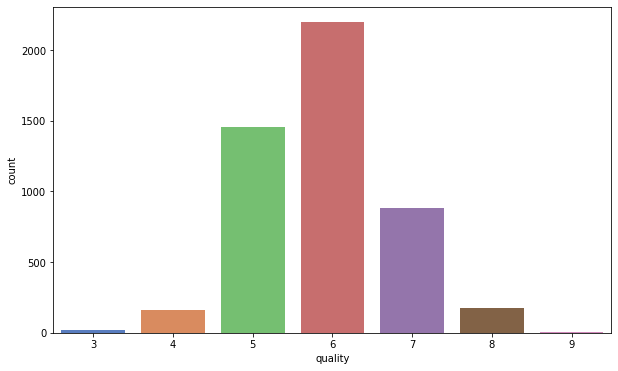

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data["quality"], palette="muted")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


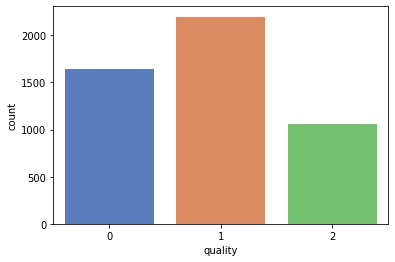

In [12]:
for i in range(len(data)):
    num = data['quality'][i]
    data['quality'][i] = 0 if num <= 5 else (2 if num > 6 else 1)

sns.countplot(data["quality"], palette="muted")

In [13]:
data.to_csv('white_3class.csv')

## Red wine

In [14]:
# Data preparation
data = pd.read_csv("winequality-red-copy.csv")
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


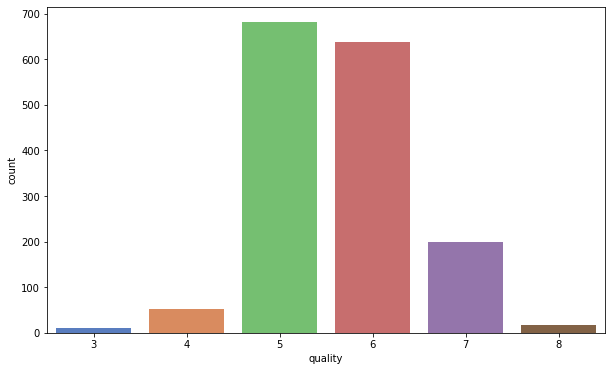

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data["quality"], palette="muted")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


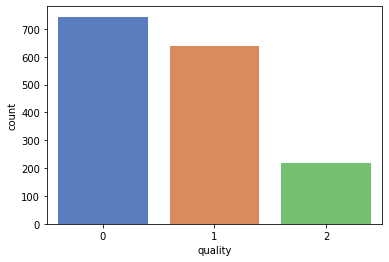

In [16]:
for i in range(len(data)):
    num = data['quality'][i]
    data['quality'][i] = 0 if num <= 5 else (2 if num > 6 else 1)

sns.countplot(data["quality"], palette="muted")

In [17]:
data.to_csv('red_3class.csv')

## Upsampling to make balanced data 

In [18]:
from sklearn.utils import resample

In [19]:
df = pd.read_csv('red_3class.csv')
print(df['quality'].value_counts())

df_0 = df[df['quality']==0]
df_1 = df[df['quality']==1]
df_2 = df[df['quality']==2]
print('-'*10, '\n', len(df_0), len(df_1), len(df_2))

df_1_upsampled = resample(df_1, replace=True,
    n_samples=len(df_0)-len(df_1), random_state=0)
df_2_upsampled = resample(df_2, replace=True,
    n_samples=len(df_0)-len(df_2), random_state=0)

df_upsampled = pd.concat([df, df_1_upsampled, df_2_upsampled])
print('-'*10, '\n', df_upsampled['quality'].value_counts())

df_upsampled.to_csv('red_3class_balanced.csv')

0    744
1    638
2    217
Name: quality, dtype: int64
---------- 
 744 638 217
---------- 
 0    744
1    744
2    744
Name: quality, dtype: int64


In [20]:
df = pd.read_csv('white_3class.csv')
print(df['quality'].value_counts())

df_0 = df[df['quality']==0]
df_1 = df[df['quality']==1]
df_2 = df[df['quality']==2]
print('-'*10, '\n', len(df_0), len(df_1), len(df_2))

df_0_upsampled = resample(df_0, replace=True,
    n_samples=len(df_1)-len(df_0), random_state=0)
df_2_upsampled = resample(df_2, replace=True,
    n_samples=len(df_1)-len(df_2), random_state=0)

df_upsampled = pd.concat([df, df_0_upsampled, df_2_upsampled])
print('-'*10, '\n', df_upsampled['quality'].value_counts())

df_upsampled.to_csv('white_3class_balanced.csv')

1    2198
0    1640
2    1060
Name: quality, dtype: int64
---------- 
 1640 2198 1060
---------- 
 1    2198
0    2198
2    2198
Name: quality, dtype: int64


#Data MEC analysis

In [34]:
# Inspired by: https://github.com/darhsu/CS294-082-Final-Project/blob/main/Multimedia_Final_Project.ipynb
nb_features = 11

def get_mec_of_dataframe(df):
  thresholds = 0
  df["feature_sum"] = df.iloc[:,:-1].sum(axis=1)
  df = df.sort_values(by="feature_sum")
  cls = 0
  for label in df["quality"]:
    if label != cls:
      thresholds += 1
      cls = label
  print("There are", thresholds, "thresholds in the dataset")
  print("This translates to a dataset MEC of", math.log(thresholds, 2) * nb_features, "bits")

In [37]:
df = pd.read_csv("white_3class.csv")
get_mec_of_dataframe(df)

There are 3066 thresholds in the dataset
This translates to a dataset MEC of 127.40356179824656 bits


In [38]:
df = pd.read_csv("red_3class.csv")
get_mec_of_dataframe(df)

There are 881 thresholds in the dataset
This translates to a dataset MEC of 107.61298029812455 bits


In [40]:
df = pd.read_csv("white_3class_balanced.csv")
get_mec_of_dataframe(df)

There are 2968 thresholds in the dataset
This translates to a dataset MEC of 126.88802914282884 bits


In [41]:
df = pd.read_csv("red_3class_balanced.csv")
get_mec_of_dataframe(df)

There are 842 thresholds in the dataset
This translates to a dataset MEC of 106.89444065373037 bits
